# Introduction
Berikut merupakan struktur coding untuk pengerjaan soal *Final Test* Python dengan menggunakan dataset loan_data.csv. <br>
[Link](https://drive.google.com/file/d/1K6OMDYu6yRdUO65Le1NbRBTNFPsbAX6s/view?usp=sharing) Download sebagai berikut.

## Soal

### 1. Tuliskan script untuk import pandas library dan library untuk klasifikasi menggunakan Decision

In [1]:
import pandas as pd 
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split 

### 2. Sebutkan setidaknya 2 library untuk fungsi visualisasi di python.

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

### 3. Import loan_data.csv.

Identifikasi tipe data dari masing-masing variable.

Tampilkan 5 baris pertama dan tampilkan informasi summary statistics-nya.

In [3]:
data = pd.read_csv('loan_data.csv')
data.shape

(9578, 14)

In [4]:
## Identifikasi tipe data dari masing-masing variable.
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
credit.policy        9578 non-null int64
purpose              9578 non-null object
int.rate             9578 non-null float64
installment          9578 non-null float64
log.annual.inc       9578 non-null float64
dti                  9578 non-null float64
fico                 9578 non-null int64
days.with.cr.line    9578 non-null float64
revol.bal            9578 non-null int64
revol.util           9578 non-null float64
inq.last.6mths       9578 non-null int64
delinq.2yrs          9578 non-null int64
pub.rec              9578 non-null int64
not.fully.paid       9578 non-null int64
dtypes: float64(6), int64(7), object(1)
memory usage: 1.0+ MB


In [5]:
## Tampilkan 5 baris pertama
data.head(5)

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


In [6]:
## Tampilkan informasi summary statistics-nya.
data.describe()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
count,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9.578000e+03,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000
mean,0.804970,0.122640,319.089413,10.932117,12.606679,710.846314,4560.767197,1.691396e+04,46.799236,1.577469,0.163708,0.062122,0.160054
std,0.396245,0.026847,207.071301,0.614813,6.883970,37.970537,2496.930377,3.375619e+04,29.014417,2.200245,0.546215,0.262126,0.366676
min,0.000000,0.060000,15.670000,7.547502,0.000000,612.000000,178.958333,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.103900,163.770000,10.558414,7.212500,682.000000,2820.000000,3.187000e+03,22.600000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.122100,268.950000,10.928884,12.665000,707.000000,4139.958333,8.596000e+03,46.300000,1.000000,0.000000,0.000000,0.000000
75%,1.000000,0.140700,432.762500,11.291293,17.950000,737.000000,5730.000000,1.824950e+04,70.900000,2.000000,0.000000,0.000000,0.000000
max,1.000000,0.216400,940.140000,14.528354,29.960000,827.000000,17639.958330,1.207359e+06,119.000000,33.000000,13.000000,5.000000,1.000000


### 4. Lakukan pengecekan missing data dan duplicated-row.

Jika ada, sebutkan kolom apa yang ada missing data.

Apakah ada duplicated-row?

In [7]:
data_missing = data.isnull().sum()
data_missing
## tidak ada missing data

credit.policy        0
purpose              0
int.rate             0
installment          0
log.annual.inc       0
dti                  0
fico                 0
days.with.cr.line    0
revol.bal            0
revol.util           0
inq.last.6mths       0
delinq.2yrs          0
pub.rec              0
not.fully.paid       0
dtype: int64

In [8]:
## cek duplicated row
data_duplicate = data.duplicated().sum()
data_duplicate
## tidak ada baris yang duplikasi

0

### 5. Lakukan pengecekan variabel target.

Ada berapa kategori pada variable target?

Berapa proporsinya?

Lakukan visualisasi yang menunjukkan PROPORSI kelas target.

In [9]:
## Ada berapa kategori pada variable target?
data_unique = data['not.fully.paid'].unique()
data_unique

array([0, 1], dtype=int64)

berdasarkan pengecekan variabel target terdapat **dua kategori pada variabel target**

In [10]:
## Berapa proporsinya?
pos = data[data["not.fully.paid"] == 1].shape[0]
neg = data[data["not.fully.paid"] == 0].shape[0]
print(f"Fully paid (1) = {pos}")
print(f"Not fully paid (0) = {neg}")
print(f"Proporsi dari positive (1) ke negative (0) = {(pos / neg) * 100:.2f}%")

Fully paid (1) = 1533
Not fully paid (0) = 8045
Proporsi dari positive (1) ke negative (0) = 19.06%


In [11]:
## rubah target yang numerik menjadi categorical, dimana 0 
data2=data.replace({'not.fully.paid': {0: 'Fully paid', 1: 'Not fully paid'}})

In [12]:
## proporsi
baldata = pd.DataFrame(data2['not.fully.paid'].value_counts())
baldata

,not.fully.paid
Fully paid,8045
Not fully paid,1533


C:\Users\nurlai064182\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:7: MatplotlibDeprecationWarning: Non-1D inputs to pie() are currently squeeze()d, but this behavior is deprecated since 3.1 and will be removed in 3.3; pass a 1D array instead.
  import sys


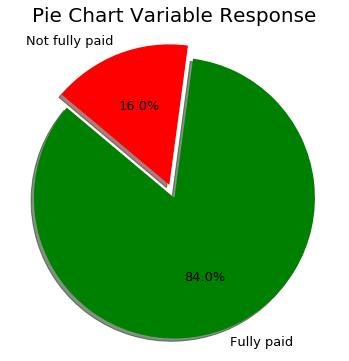

In [13]:
## Lakukan visualisasi yang menunjukkan PROPORSI kelas target.
explode = (0.1, 0) 
colors = ['green','red']
plt.figure(figsize=(6,6)) 
plt.pie(baldata, labels = baldata.index,
        autopct='%1.1f%%', shadow=True, startangle=140, 
        explode=explode, colors=colors, textprops = {"fontsize":13})
 
plt.axis('equal')
plt.title('Pie Chart Variable Response',size=20);

### 6. Berapa variansi (ragam) nilai installment?

In [14]:
print("Variansi (ragam) nilai installment sebesar {} ".format(data['installment'].std()))

Variansi (ragam) nilai installment sebesar 207.07130149985852 


### 7. Berapa nilai simpangan kuartil pada variable ‘installment’?

In [15]:
print("Nilai simpangan kuartil pada variable ‘installment’ adalah {}".format(round(data['installment'].quantile(0.75) - data['installment'].quantile(0.25)),2))

Nilai simpangan kuartil pada variable ‘installment’ adalah 269.0


### 8. Berapa nilai installment tertinggi untuk masing-masing tujuan pinjaman (masing-masing kategori pada variable ‘purpose’)?

In [16]:
answer8 = data[['purpose','installment']].sort_values('purpose', ascending=False).groupby('purpose').max()
answer8

,installment
purpose,
all_other,916.95
credit_card,922.42
debt_consolidation,940.14
educational,861.88
home_improvement,902.06
major_purchase,898.55
small_business,926.83


### 9. Variable ‘purpose’ menunjukkan tujuan pengajuan pinjaman.

Ada berapa kategori pada variable tersebut?

Visualisasikan frekuensi pinjaman berdasarkan tujuannya, diurutkan dari frekuensi tertinggi.

In [17]:
## Ada berapa kategori pada variable tersebut?
data['purpose'].unique()

array(['debt_consolidation', 'credit_card', 'all_other',
       'home_improvement', 'small_business', 'major_purchase',
       'educational'], dtype=object)

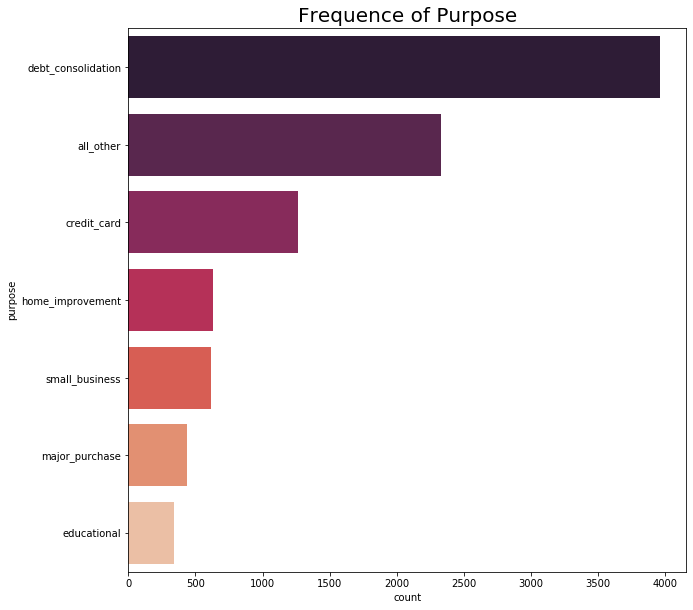

In [18]:
## Visualisasikan frekuensi pinjaman berdasarkan tujuannya, diurutkan dari frekuensi tertinggi.
plt.figure(1, figsize=(10, 10))
plt.title("Frequence of Purpose", fontsize = 20)
sns.countplot(y=data['purpose'],order=data['purpose'].value_counts().index, palette="rocket")

### 10. Apakah variable ‘fico’ merupakan predictor yang potensial untuk memprediksi target? Jelaskan argumen anda. Hint: Visualisasikan distribusi ‘fico’ terhadap target.

variable ‘fico’ merupakan predictor yang potensial untuk memprediksi target dikarenakan variabel fico merupakan 

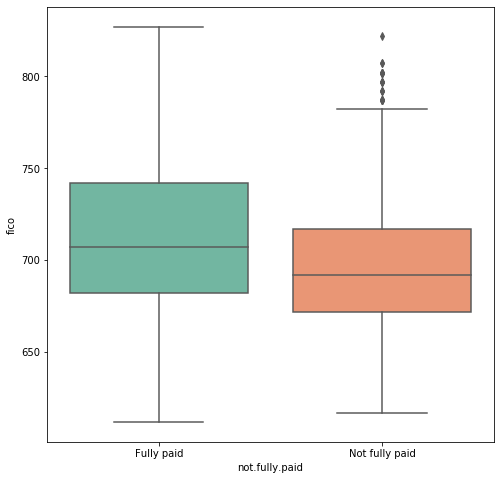

In [19]:
plt.figure(figsize = (8, 8))
sns.boxplot(x=data2['not.fully.paid'], y=data2['fico'], palette="Set2")

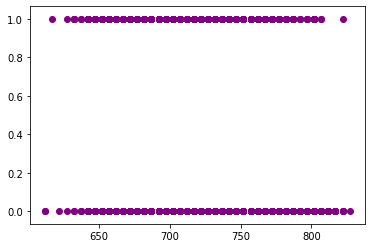

In [20]:
plt.scatter(data['fico'], data['not.fully.paid'], color='purple')

C:\Users\nurlai064182\AppData\Local\Continuum\anaconda3\lib\site-packages\seaborn\distributions.py:218: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  color=hist_color, **hist_kws)


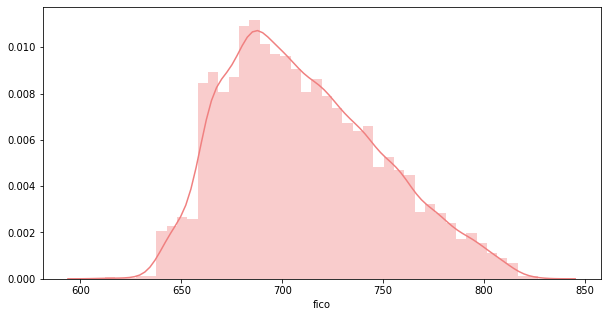

In [21]:
axes = plt.subplots(figsize=(10,5))
sns.distplot(data['fico'],  ax=axes[1], color='lightcoral')

Variabel fico memiliki pengaruh yang kuat terhadap target 'not.fully.paid' dikarenakan variance variabel terhadap masing-masing target cukup terlihat (ditunjukkan pada boxplot), sedangkan saat dilakukan pengecekan menggunakan scatter plot sebaran antar target sangat terlihat perbedaannya. <br>
Serta dibuktikan pada tampilan distribution plot yang mendekati distribusi normal, hal tersebut menandakan bahwa **variabel fico memiliki pengaruh yang besar**.

### 11. Apakah variable ‘purpose’ merupakan predictor yang potensial untuk memprediksi target? Jelaskan argumen anda.

Hint: Visualisasikan proporsi setiap kategori dalam variable ‘purpose’ terhadap target. Fungsi pd.crosstab akan membantu.

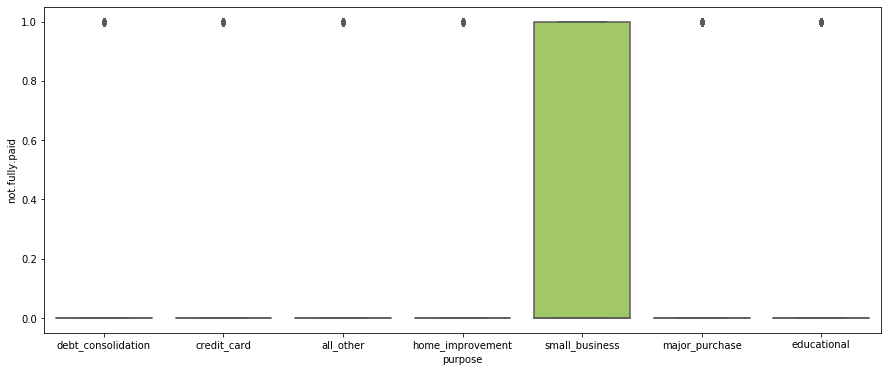

In [22]:
plt.figure(figsize = (15, 6))
sns.boxplot(x=data['purpose'], y=data['not.fully.paid'], palette="Set2")

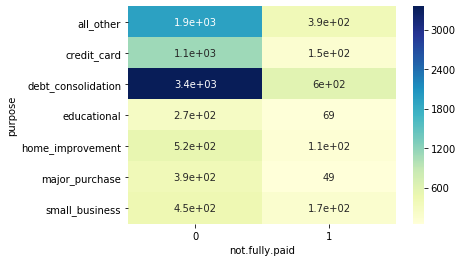

In [23]:
sns.heatmap(pd.crosstab(data.purpose, data['not.fully.paid']),
            cmap="YlGnBu", annot=True, cbar=True)

Urutan tiga terbesar prediktor yang potensial untuk memprediksi target adalah sebagai berikut: <br>
1. debt_consolidation
2. all_other
3. credit_card

### 12. Berapa nilai rata-rata dari int.rate untuk purpose dengan kategori ‘credit_card’?

In [24]:
credit_card = data[data['purpose']=='credit_card']
print('Nilai rata-rata dari int.rate untuk purpose dengan kategori ‘credit_card’ sebesar %.2f' % credit_card['int.rate'].mean())

Nilai rata-rata dari int.rate untuk purpose dengan kategori ‘credit_card’ sebesar 0.12


### 13. Berapa jumlah kasus pinjaman yang nilai installment-nya di atas 200 dan tujuan pinjamannya untuk pendidikan (educational) ?

In [25]:
count = data[(data['installment'] > 200) & (data['purpose'] == 'educational')]
print("Jumlah kasus pinjaman yang nilai installment-nya di atas 200 dan tujuan pinjamannya untuk pendidikan (educational) adalah {}".format(len(count)))

Jumlah kasus pinjaman yang nilai installment-nya di atas 200 dan tujuan pinjamannya untuk pendidikan (educational) adalah 137


### 14. Tuliskan script untuk memfilter purpose =’credit_card’ dan simpan dalam dataframe yang disebut loans3.

In [26]:
## filter purpose = credit_card
loans3 = pd.DataFrame(data[data['purpose']=='credit_card'])
## simpan ke dataframe
loans3

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0
5,1,credit_card,0.0788,125.13,11.904968,16.98,727,6120.041667,50807,51.0,0,0,0,0
17,1,credit_card,0.0894,476.58,11.608236,7.07,797,6510.958333,7586,52.7,1,0,0,0
22,1,credit_card,0.1355,339.60,11.512925,7.94,662,1939.958333,21162,57.7,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9526,0,credit_card,0.0788,437.93,11.820410,15.87,757,6720.041667,232755,23.0,0,0,0,0
9530,0,credit_card,0.1099,425.56,11.571194,16.36,722,7500.041667,22354,65.6,4,0,0,0
9538,0,credit_card,0.1422,244.28,11.561716,0.70,687,7920.041667,505,9.0,6,1,0,0
9557,0,credit_card,0.1025,466.35,12.206073,13.97,722,6120.041667,338935,78.3,2,0,0,0


In [27]:
## cek unik value di kolom purpose
loans3.purpose.unique()

array(['credit_card'], dtype=object)

### 15. Siapkan data untuk pemodelan.

Ubah data kategorik menjadi dummy variabel.

Buat dataframe baru bernama ‘final_data’ yang berisi seluruh features (numerik dan kategorik) dengan peubah kategorik yang sudah diubah menjadi dummy variabel.

In [28]:
## Ubah data kategorik menjadi dummy variabel.
category_dummies = pd.get_dummies(data['purpose'], drop_first=True)
category_dummies.head()

,credit_card,debt_consolidation,educational,home_improvement,major_purchase,small_business
0,0,1,0,0,0,0
1,1,0,0,0,0,0
2,0,1,0,0,0,0
3,0,1,0,0,0,0
4,1,0,0,0,0,0


In [29]:
## Buat dataframe baru bernama ‘final_data’ yang berisi seluruh features (numerik dan kategorik) dengan peubah kategorik yang sudah diubah menjadi dummy variabel.
final_data = data.drop(columns='purpose')
final_data = pd.concat([final_data, category_dummies], axis=1)
final_data

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid,credit_card,debt_consolidation,educational,home_improvement,major_purchase,small_business
0,1,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0,0,1,0,0,0,0
1,1,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0,1,0,0,0,0,0
2,1,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0,0,1,0,0,0,0
3,1,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0,0,1,0,0,0,0
4,1,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9573,0,0.1461,344.76,12.180755,10.39,672,10474.000000,215372,82.1,2,0,0,1,0,0,0,0,0,0
9574,0,0.1253,257.70,11.141862,0.21,722,4380.000000,184,1.1,5,0,0,1,0,0,0,0,0,0
9575,0,0.1071,97.81,10.596635,13.09,687,3450.041667,10036,82.9,8,0,0,1,0,1,0,0,0,0
9576,0,0.1600,351.58,10.819778,19.18,692,1800.000000,0,3.2,5,0,0,1,0,0,0,1,0,0


### 16. Split final_data yang didapatkan dari soal sebelumnya menjadi data train dan data test. Proporsi data test adalah 0.30. Gunakan random_state = 101.

In [30]:
## inisiasi X dan y
X = final_data.drop(columns=['not.fully.paid'])
y = final_data['not.fully.paid']
print(X.shape)
print(y.shape)

(9578, 18)
(9578,)


In [31]:
## split train dan tes data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 101)

### 17. Buatlah sebuah instance DecisionTreeClassifier yang disebut ‘dtree’ dan buatlah model dari training data menggunakan dtree tersebut.

In [32]:
## inisiasi algoritma Decision Tree
dtree = DecisionTreeClassifier()
dtree.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

### 18. Buatlah script untuk meprediksi target pada data test dengan menggunakan model yang telah dibuat sebelumnya, simpan dalam variable ‘predictions’

In [33]:
## inisiasi untuk prediksi target pada data test
predictions = dtree.predict(X_test)

### 19. Tampilkan confusion matrix antara hasil prediksi dan target data test.

Confusion Matrix: [[1994  339]
 [ 437  104]]


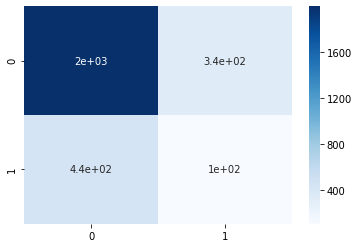

In [34]:
## load lirary
from sklearn.metrics import confusion_matrix
## inisiasi confusion_matrix untuk pred dan target tes
cm = confusion_matrix(predictions, y_test)
print('Confusion Matrix: {}'.format(cm))
## visualisasi
sns.heatmap(cm, annot=True, cmap="Blues")

### 20. Tampilkan ukuran kebaikan model, setidaknya nilai Akurasi, Sensitivity dan Specificity.

In [35]:
## inisiasi nilai X test
total_test = len(X_test)

accuracy = (cm[0,0]+cm[1,1]) / total_test
print('Nilai Akurasi : {}'.format(accuracy))

sensitivity = cm[0,0] / (cm[0,0]+cm[0,1])
print('Nilai Sensitivity : {}'.format(sensitivity))

specificity = cm[1,1] / (cm[1,0]+cm[1,1])
print('Nilai Specificity : {}'.format(specificity))

Nilai Akurasi : 0.7299930410577592
Nilai Sensitivity : 0.8546935276468067
Nilai Specificity : 0.1922365988909427
